# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [21]:
bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_cat'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, include_lowest=True)
df[['APGAR5', 'APGAR5_cat']].head()

,APGAR5,APGAR5_cat
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

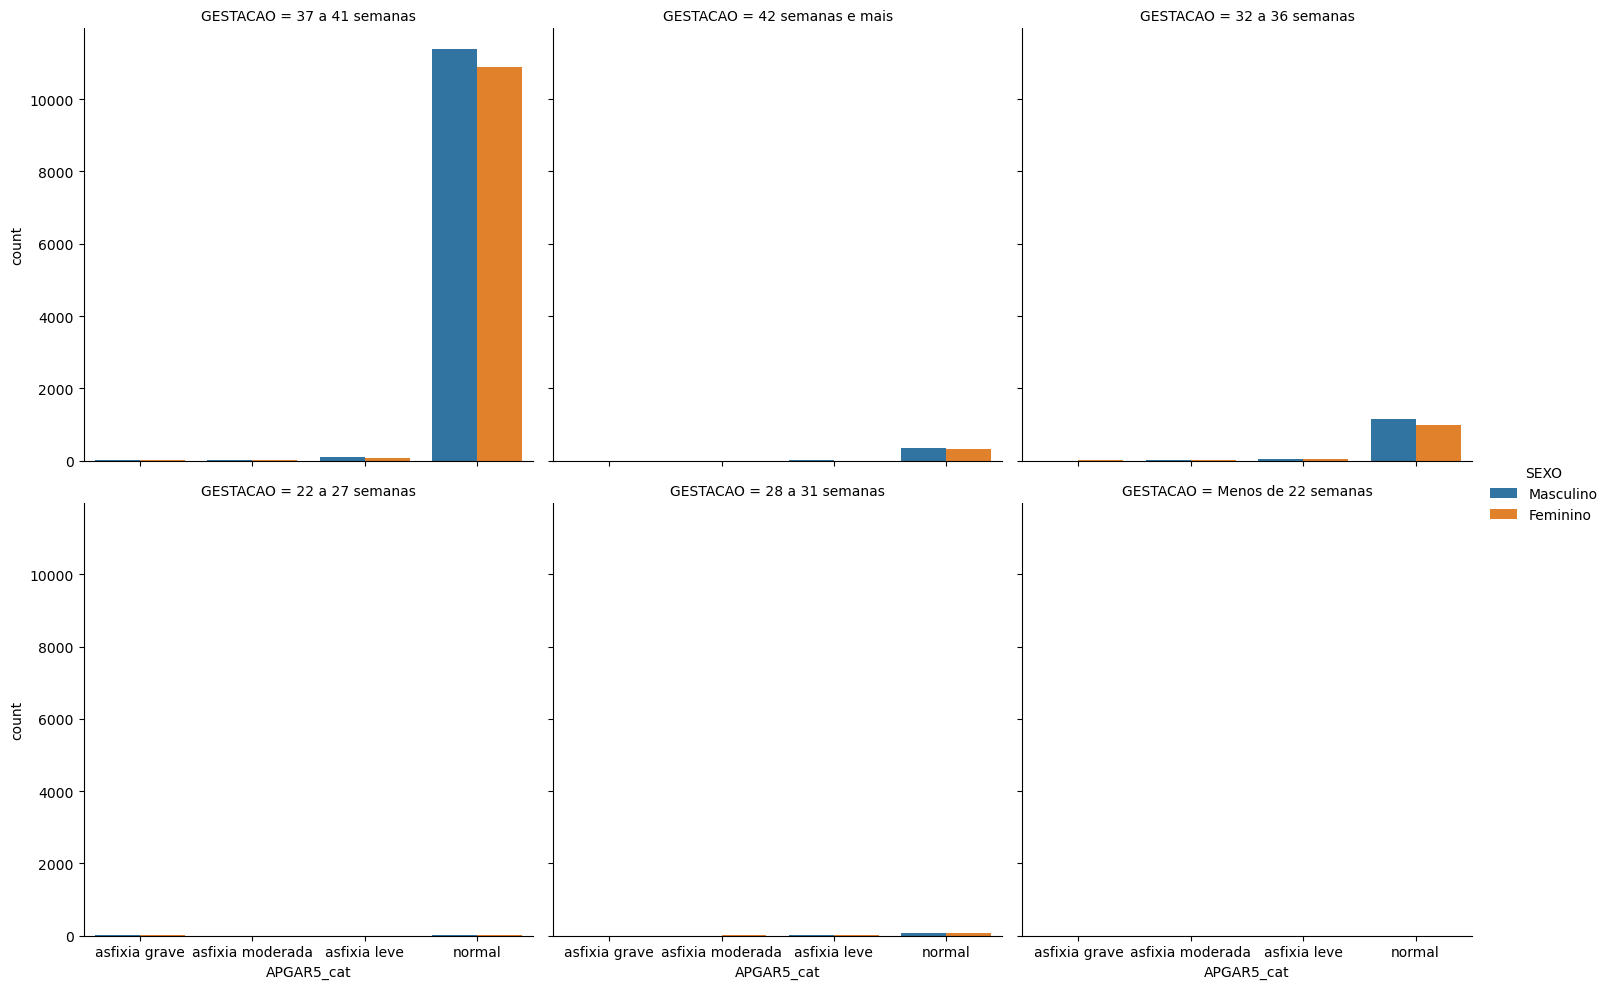

In [25]:
sns.catplot(x='APGAR5_cat', hue='SEXO', col='GESTACAO', data=df, kind='count', col_wrap=3)
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [27]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_cat'])
tabela_cruzada

APGAR5_cat,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [29]:
tabela_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
tabela_percentual

APGAR5_cat,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.011765,0.141176,0.600000
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.003581,0.008505,0.032677,0.955237
37 a 41 semanas,0.001465,0.001243,0.008702,0.988589
42 semanas e mais,0.001433,0.001433,0.008596,0.988539
Menos de 22 semanas,0.285714,0.000000,0.142857,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

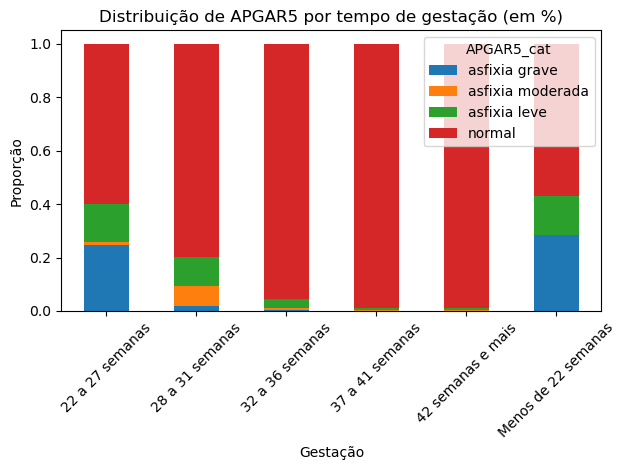

In [41]:
tabela_percentual.plot.bar(stacked=True)
plt.title('Distribuição de APGAR5 por tempo de gestação (em %)')
plt.ylabel('Proporção')
plt.xlabel('Gestação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# observamos que a gestação com menos semanas tem mais casos de asfixia grave, o que reforça o que os médicos dizem sobre partos antes de 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

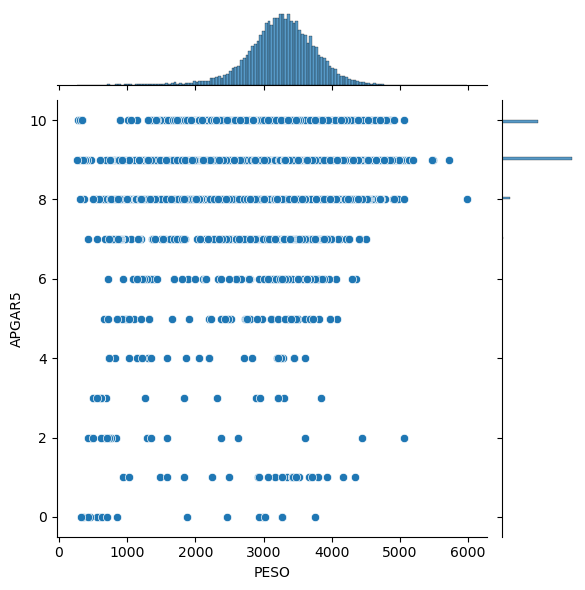

In [37]:
sns.jointplot(x='PESO', y='APGAR5', data=df)